In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [72]:
dataset = pd.read_csv(r"C:\Users\wwwph\Downloads\Loan_Prediction.csv", delimiter=';')

In [73]:
dataset

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [74]:
dataset.shape

(614, 13)

In [75]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [76]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [77]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

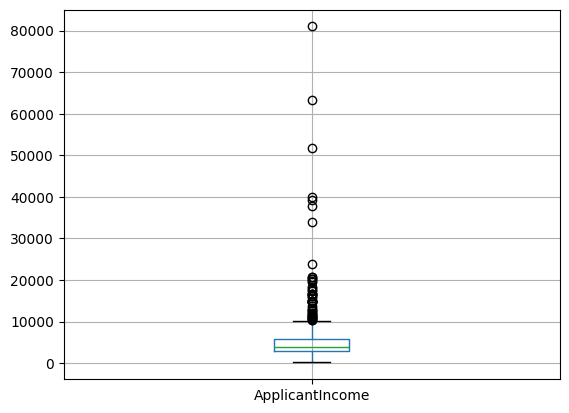

In [78]:
dataset.boxplot(column='ApplicantIncome')

<Axes: >

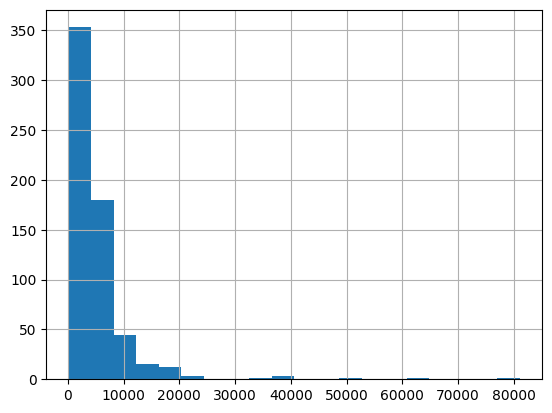

In [79]:
dataset['ApplicantIncome'].hist(bins=20)

<Axes: >

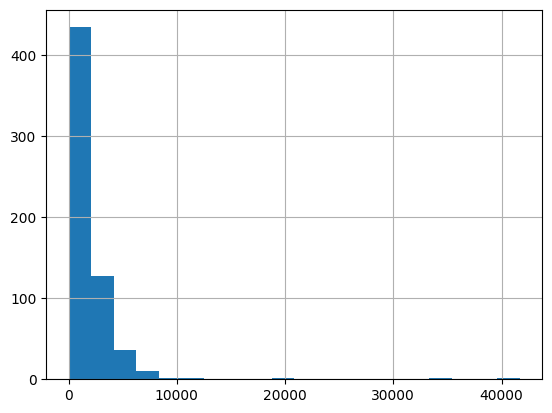

In [80]:
dataset['CoapplicantIncome'].hist(bins=20)

<Axes: >

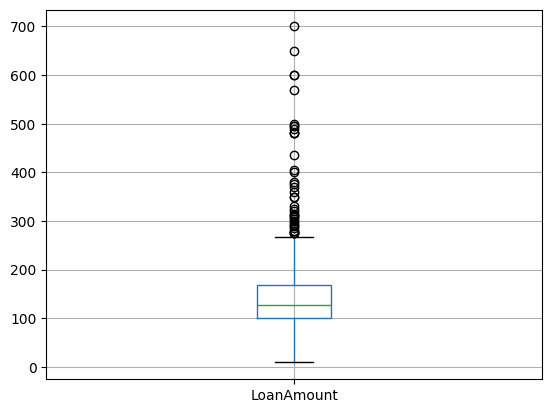

In [81]:
dataset.boxplot(column='LoanAmount')

<Axes: >

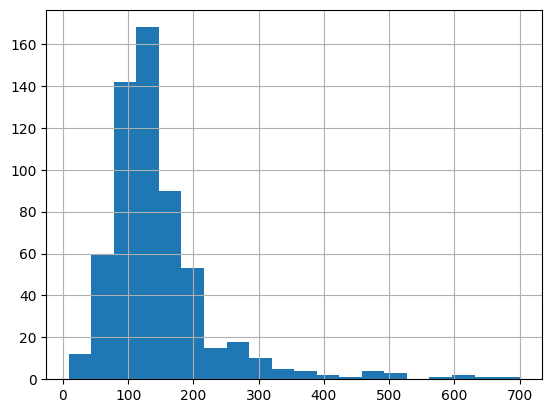

In [82]:
dataset['LoanAmount'].hist(bins=20)

<Axes: >

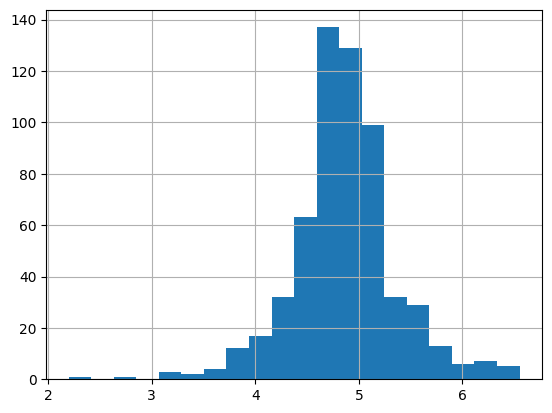

In [83]:
dataset['LoanAmount_Log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_Log'].hist(bins=20)


In [84]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Log       22
dtype: int64

In [86]:
dataset['Married'] = dataset['Married'].fillna(dataset['Married'].mode()[0])


In [103]:
dataset['Dependents']=dataset['Dependents'].fillna(dataset['Dependents'].mode()[0])

KeyError: 0

In [88]:
dataset['Self_Employed'] = dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0])


In [89]:
dataset['LoanAmount'] = dataset['LoanAmount'].fillna(dataset['LoanAmount'].mean())

In [90]:
dataset['LoanAmount_Log'] = dataset['LoanAmount_Log'].fillna(dataset['LoanAmount_Log'].mean())

In [91]:
dataset['Loan_Amount_Term'] = dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0])


In [92]:
dataset['Credit_History'] = dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0])


In [102]:
dataset.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents           614
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status            0
LoanAmount_Log         0
dtype: int64

In [104]:
dataset.drop(columns=['Dependents'], inplace=True)


In [105]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_Log       0
dtype: int64

In [106]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_Log'] = np.log(dataset['TotalIncome'])

In [107]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
categorical_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']
for col in categorical_cols:
    dataset[col] = encoder.fit_transform(dataset[col])


## Feature Selection & Train-Test Split
----------------------------------------------------------------------------------------

In [108]:
from sklearn.model_selection import train_test_split


X = dataset.drop(columns=['Loan_ID', 'Loan_Status'])  
y = dataset['Loan_Status']

# Splitting dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## Training Machine Learning Models
------------------------------------------------------------------------------------

In [109]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {accuracy:.2f}")


Logistic Regression Accuracy: 0.79
Decision Tree Accuracy: 0.69
Random Forest Accuracy: 0.76


C:\Users\wwwph\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model Optimization (Hyperparameter Tuning)
----------------------------------------------------------------------------------------

In [111]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 10, None]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best Score:", grid_search.best_score_)


Best Parameters: {'max_depth': 3, 'n_estimators': 50}
Best Score: 0.8104926819212533


## Making Predictions on New Data
---------------------------------------------------------------------------------------

In [113]:
import numpy as np


new_data["TotalIncome"] = new_data["ApplicantIncome"] + new_data["CoapplicantIncome"]
new_data["LoanAmount_Log"] = np.log(new_data["LoanAmount"] + 1)  
new_data["TotalIncome_Log"] = np.log(new_data["TotalIncome"] + 1) 

new_data = new_data[X_train.columns]  

prediction = models["Random Forest"].predict(new_data)
print("Loan Status:", "Approved" if prediction[0] == 1 else "Not Approved")


Loan Status: Approved
